In [19]:
#https://wtrust.com.br/
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

[Baixar base do yahoo](http://127.0.0.1:8888/notebooks/trades/pairs_trading_b3/utils/Historic-Yahoo.ipynb)

In [20]:
def plot_pairs(pairs, data, period_ext=None):
    counter=-1
    for i, row in pairs.iterrows():
        counter+=1
        print(counter)
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        if (period_ext == None):
            period = row['Period']
        else:
            period=period_ext
        mult.plot_residue3(data, y_symbol, x_symbol, period)

def lot_short_cash_neutral(price_long, price_short, lot_long):
    return roundup((price_long*lot_long)/price_short)

def roundup(value):
    #return int(math.ceil(value / 100.0)) * 100
    ret = int(round(value, -2))
    if (ret <= 0):
        return 100
    return ret

def parameters_input_cash_neutral(pairs, data, lot=100):
    for i, row in oper.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        signalStr = row['SignalStr'].split('/')

        y_price = data[y_symbol][0]
        x_price = data[x_symbol][0]

        y_lot = 0
        x_lot = 0
        if (signalStr[0]=='Long'):
            x_lot = lot_short_cash_neutral(y_price, x_price, lot)
            y_lot = lot
        else:
            y_lot = lot_short_cash_neutral(x_price, y_price, lot)
            x_lot = lot

        print('{}: {} ({}) {} <-> {}: {} ({}) {}'.format(\
            signalStr[0], y_symbol, round(y_price, 2), y_lot, signalStr[1], x_symbol, round(x_price, 2), x_lot))
        
def check_coint(pairs, data):
    for i, row in oper.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        period = row['Period']
        check = mult.check_cointegration(data[y_symbol], data[x_symbol], period)
        print('{}/{}, {}, {}, {}'.format(y_symbol, x_symbol, period, check['is_stationary'], check['adf']))

In [21]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [22]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-08-19
data: (325, 74)
pairs: (2320, 12)


In [23]:
#data.to_excel('datasets/data_cart.xlsx')

In [24]:
#pairs

In [42]:
pairs_signal = pairs.loc[
    (pairs['Std'] > 2) \
    & (pairs['Std'] <= 2.5) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 2) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,SignalStr,Corr,PeriodQt,PeriodStr
0,100,CSNA3,IGTA3,-4.532663,99,0.129166,2.417427,2,Short/Long,0.262862,9,"100,120,140,160,180,200,220,240,250"
1,100,CSNA3,IRBR3,-4.501527,99,0.216737,2.244264,2,Short/Long,0.278051,9,"100,120,140,160,180,200,220,240,250"
2,100,GGBR4,MRVE3,-4.463265,99,0.098158,2.360998,2,Short/Long,0.458128,9,"100,120,140,160,180,200,220,240,250"
3,100,GGBR4,MULT3,-4.490306,99,0.147568,2.336240,2,Short/Long,0.406123,9,"100,120,140,160,180,200,220,240,250"
4,100,GGBR4,TAEE11,-4.467585,99,0.288875,2.006495,2,Short/Long,0.214743,9,"100,120,140,160,180,200,220,240,250"
5,100,GGBR4,TIMP3,-4.524718,99,0.207920,2.269386,2,Short/Long,0.241532,9,"100,120,140,160,180,200,220,240,250"
6,100,GGBR4,UGPA3,-4.515933,99,0.207866,2.398904,2,Short/Long,0.486315,9,"100,120,140,160,180,200,220,240,250"
7,100,GOAU4,IGTA3,-4.769051,99,0.059406,2.369918,2,Short/Long,0.373346,9,"100,120,140,160,180,200,220,240,250"
8,100,GOAU4,MRVE3,-4.302431,99,0.057127,2.138921,2,Short/Long,0.454649,9,"100,120,140,160,180,200,220,240,250"
9,100,GOAU4,MULT3,-4.413345,99,0.078127,2.055924,2,Short/Long,0.390303,9,"100,120,140,160,180,200,220,240,250"


In [39]:
mult.halflife_ser(data['CSNA3'], data['IGTA3'], 100)

6.661487014223651

Plot o gráficos dos resíduos de 'pairs_signal'

0


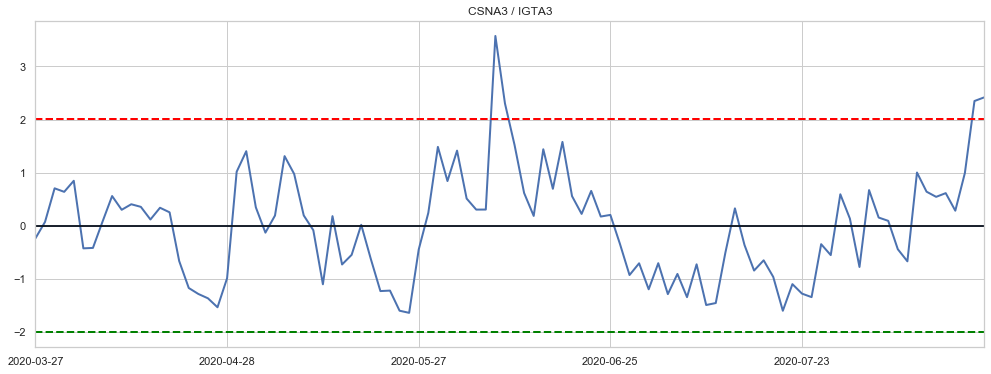

1


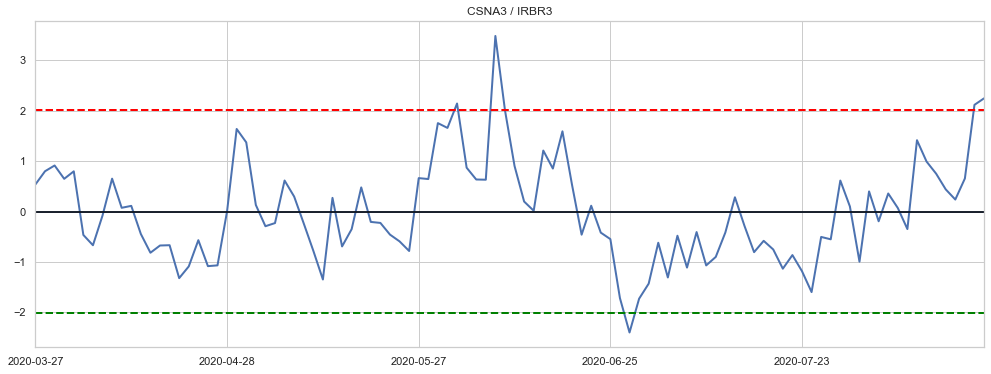

2


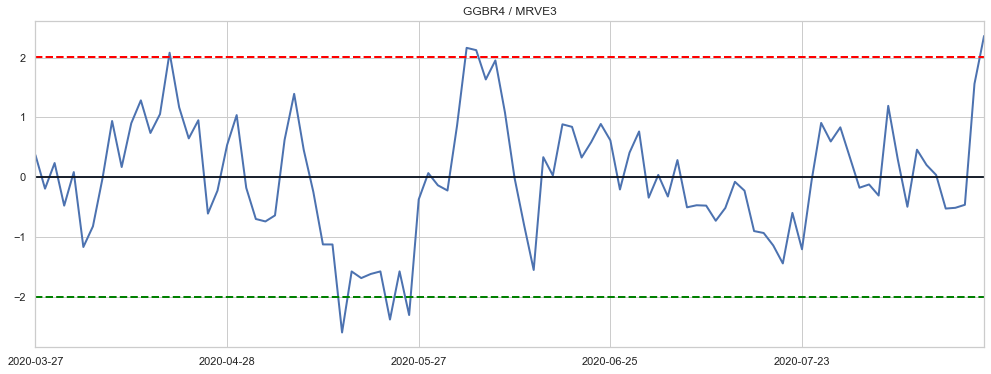

3


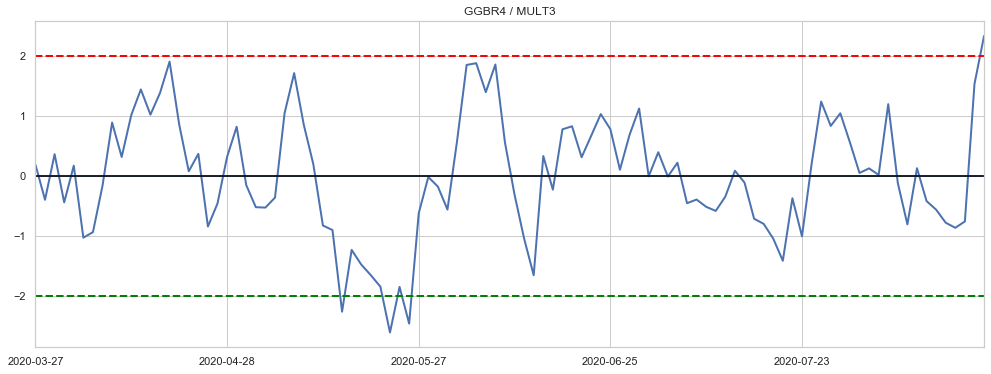

4


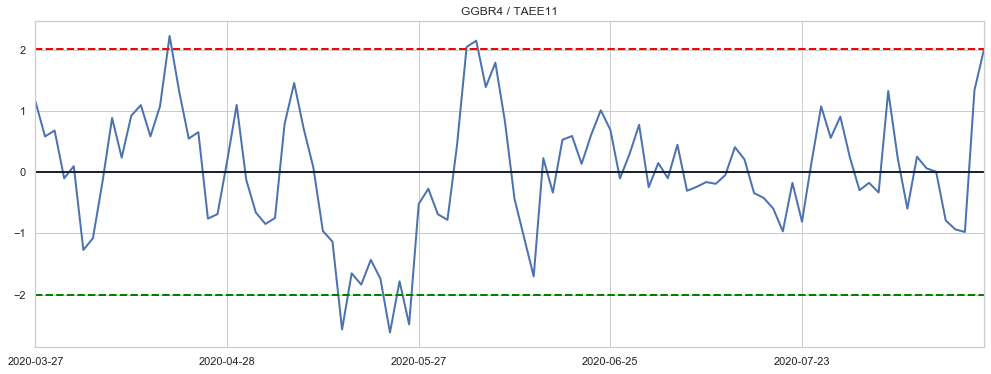

5


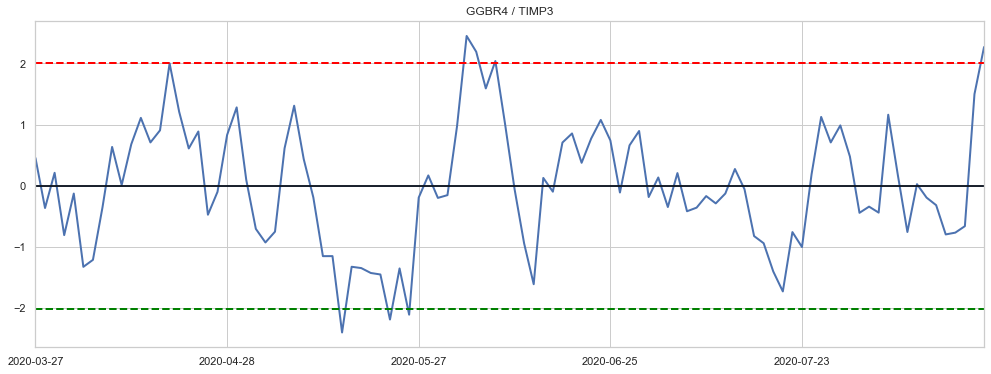

6


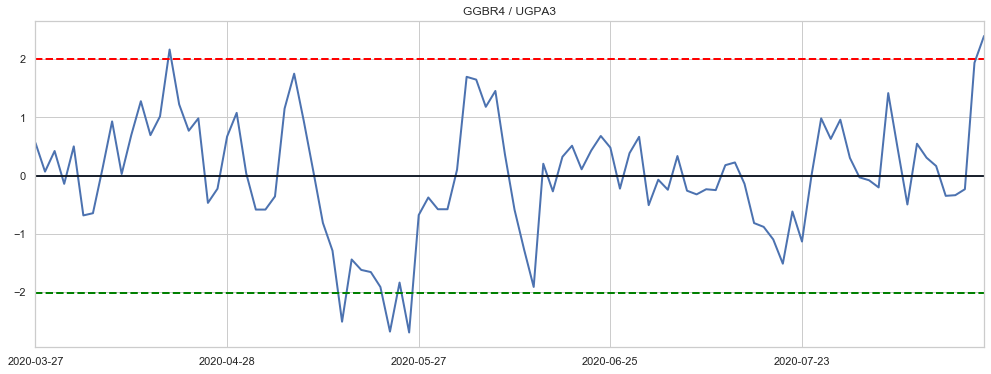

7


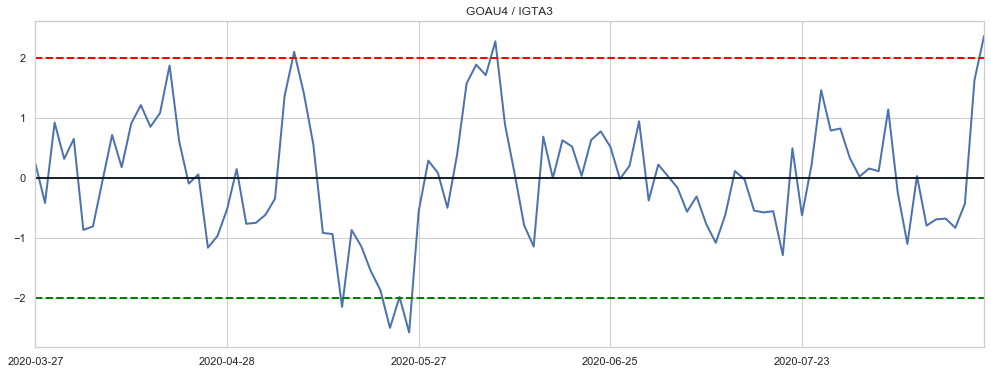

8


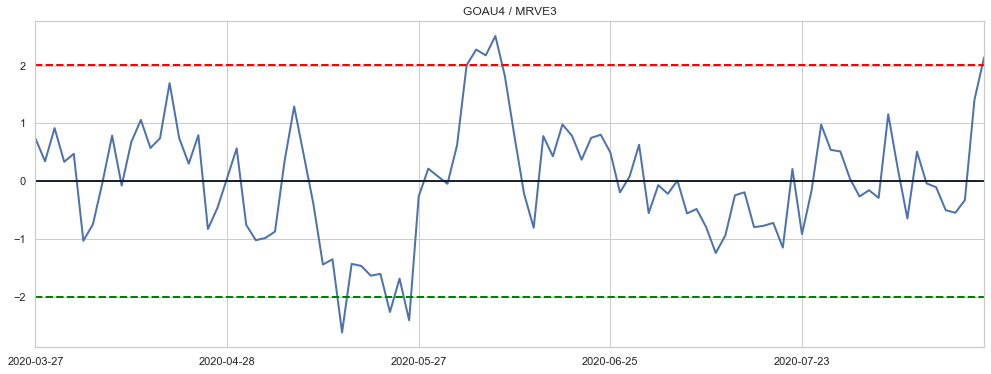

9


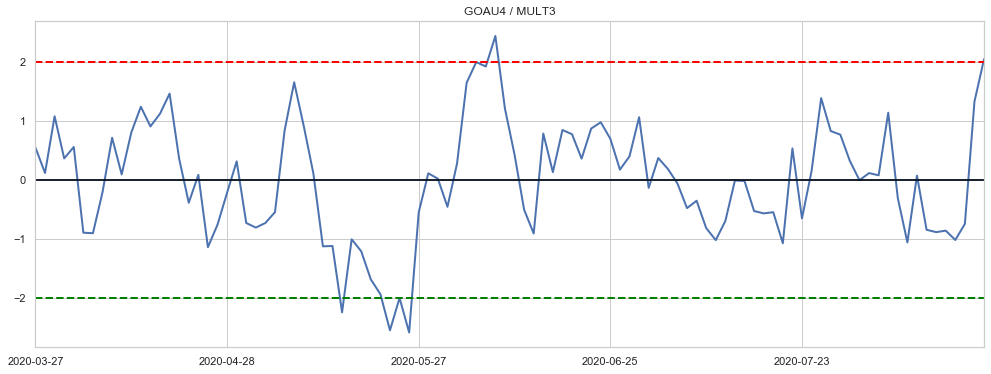

10


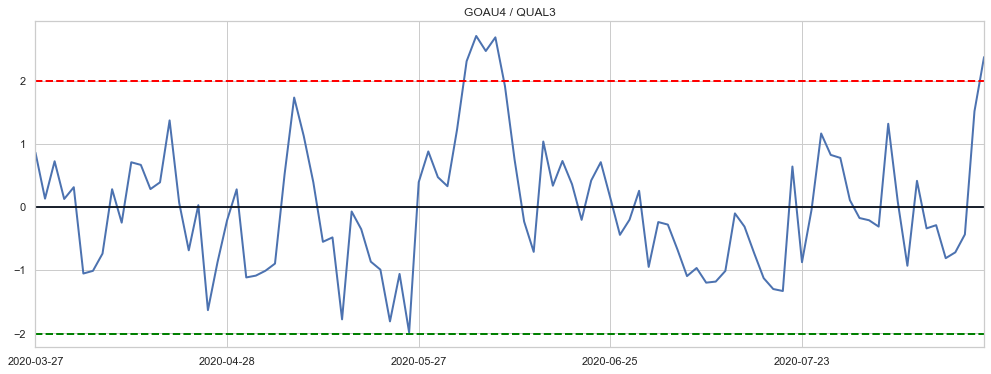

11


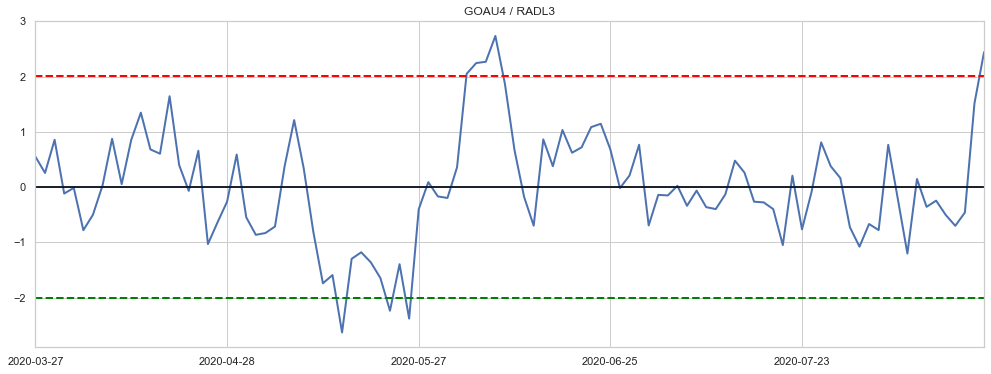

12


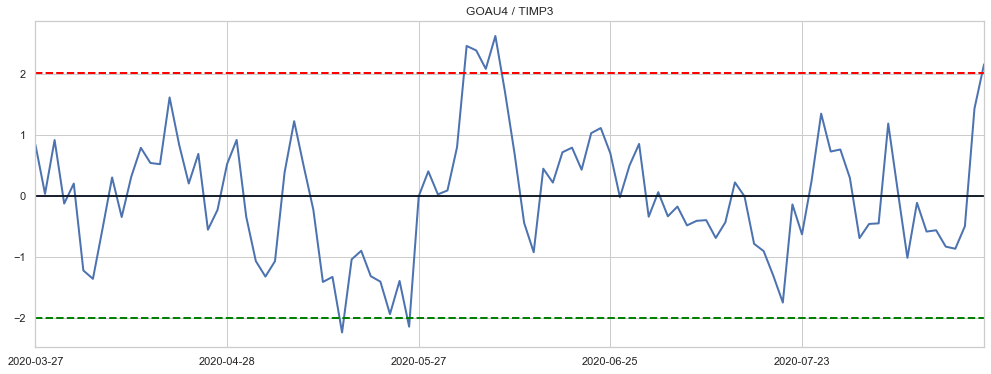

13


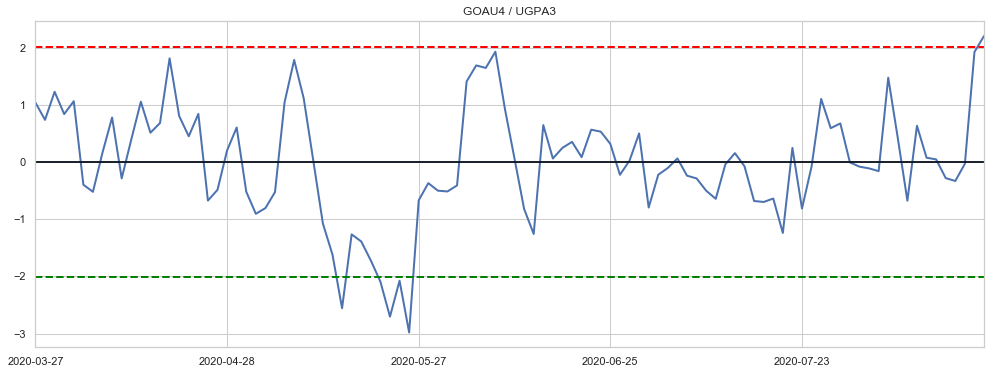

14


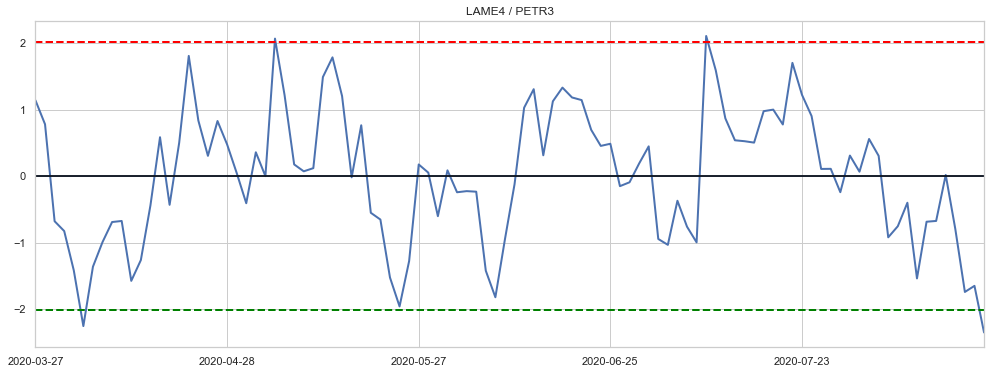

In [43]:
plot_pairs(pairs_signal, data)
#mult.plot_residue(mult.residue(data['HAPV3'], data['IRBR3'], 100))

In [28]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [29]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [30]:
oper = pd.read_csv('datasets/operations.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,SignalStr,Corr,PeriodQt,PeriodStr
0,100,EGIE3,EMBR3,-5.253019,99,0.673937,2.117169,2,Long/Short,0.324547,9,"100,120,140,160,180,200,220,240,250"
1,100,ENGI11,GNDI3,-4.829187,99,0.557605,2.022712,2,Long/Short,0.500966,9,"100,120,140,160,180,200,220,240,250"
2,100,RADL3,TAEE11,-3.807030,99,-0.658756,2.061516,2,Long/Short,0.204591,9,"100,120,140,160,180,200,220,240,250"
3,100,ABEV3,BPAC11,-4.891320,99,0.070160,2.305211,2,Long/Short,0.641191,9,"100,120,140,160,180,200,220,240,250"


In [31]:
"""new = pairs_signal.iloc[[0,1,2,5,6]].copy()

oper = pd.concat([new, oper])
oper.reset_index(drop=True, inplace=True)
oper.to_csv('datasets/operations.csv', index=False)
oper"""

"new = pairs_signal.iloc[[0,1,2,5,6]].copy()\n\noper = pd.concat([new, oper])\noper.reset_index(drop=True, inplace=True)\noper.to_csv('datasets/operations.csv', index=False)\noper"

In [32]:
#oper.to_csv('datasets/operations.csv', index=False)

In [33]:
check_coint(oper, data)

EGIE3/EMBR3, 100, True, 99
ENGI11/GNDI3, 100, True, 99
RADL3/TAEE11, 100, True, 99
ABEV3/BPAC11, 100, True, 95


0


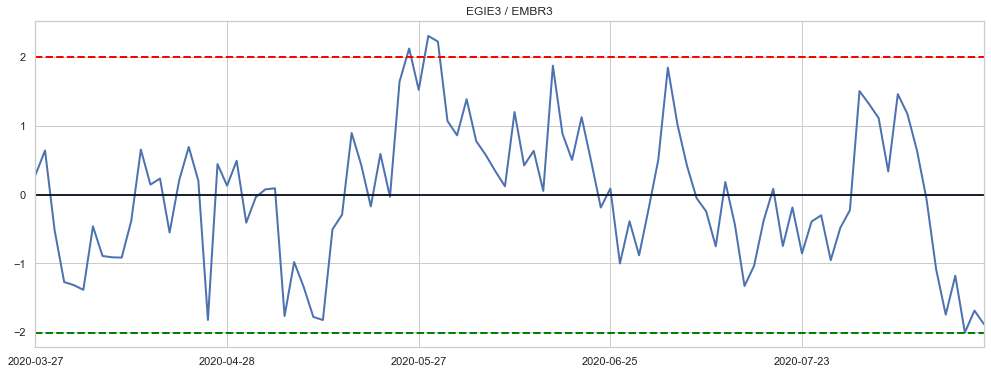

1


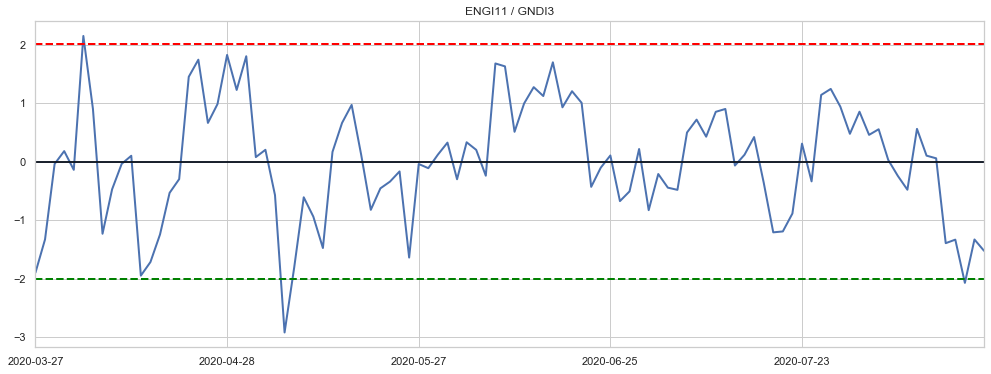

2


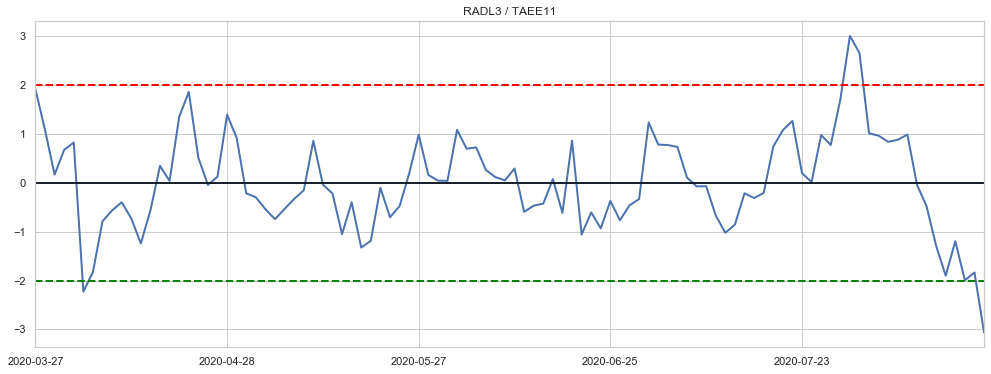

3


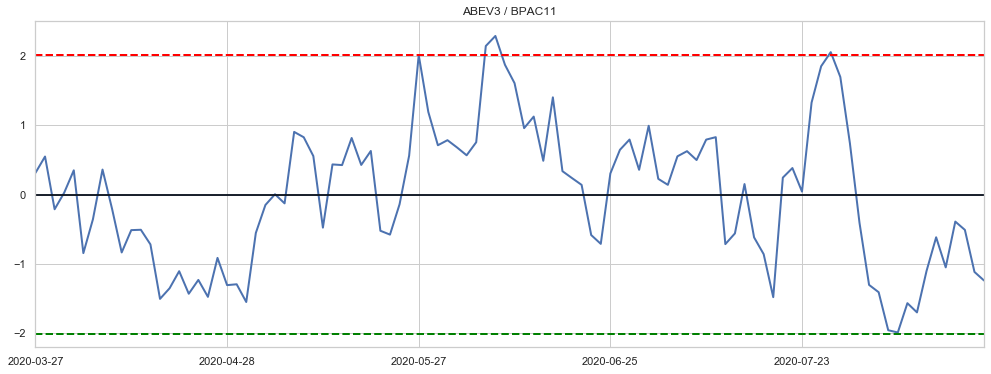

In [34]:
plot_pairs(oper, data)

In [35]:
#df.to_excel('datasets/data_cart.xlsx')

In [36]:
parameters_input_cash_neutral(oper, data)

Long: EGIE3 (43.03) 100 <-> Short: EMBR3 (7.16) 600
Long: ENGI11 (43.88) 100 <-> Short: GNDI3 (65.34) 100
Long: RADL3 (107.14) 100 <-> Short: TAEE11 (28.47) 400
Long: ABEV3 (12.85) 100 <-> Short: BPAC11 (83.88) 100
